# Fitting a logistic regression model and evaluating the performance.

In this notebook, I will import data that was generated from WE02a-data-gen. I will  fit a logistic regression model to the data, and evaluate the resulting performance of this model (use the confusion matrix and associated metrics). Add a section at the end of the notebook and discuss how well the model performed on the test data.

### Importing necessary libraries and set 1 as random seed

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle

np.random.seed(1)

### Load data from CSV file into dataframe

In [11]:
data = pd.read_csv('we02a_dataset.csv')

## Conducting an initial exploration of the data

Things are simple with this dataset. There is one input variable and one target variable. The input variable is continuous and the target is boolean. We can see that there are no missing values in the dataset.

The following code will:
* display the first 5 rows of the dataframe
* check the dimensions of the dataframe
* check the data types of the columns
* check for missing values
* develop scatterplot of the data
* provide a statistical summary of the data


In [12]:
data.head(5)

,input,target
0,47.531980,False
1,74.829204,True
2,10.010294,False
3,37.209932,False
4,23.208030,False


In [13]:
data.shape

(1000, 2)

In [14]:
data.dtypes

input     float64
target       bool
dtype: object

In [15]:
data.isnull().sum()

input     0
target    0
dtype: int64

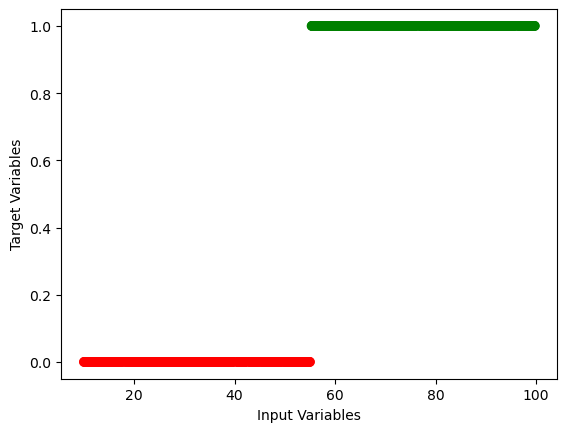

In [16]:
fig = plt.figure()
ax = fig.add_subplot()
colors = np.array(["red", "green"])
ax.scatter(data['input'], data['target'], c=colors[np.ravel(data['target'].astype(int))])
ax.set_xlabel('Input Variables')
ax.set_ylabel('Target Variables')
plt.show()

In [17]:
data.describe()

,input
count,1000.000000
mean,55.054414
std,25.965057
min,10.010294
25%,32.674114
50%,55.675073
75%,77.560414
max,99.759057


### Create a logistic model that best fits the data
To avoid overfitting, I used a cross validation approach. This involves randoming splitting the data into a training and test dataset.I used 80/20 here.

In [18]:
X=data[['input']]
y=data[['target']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [20]:
trainData = X_train.copy()
trainData['target'] = y_train


In [21]:
trainData.head(5)

,input,target
382,99.077654,True
994,59.920058,True
982,88.317257,True
47,36.425273,False
521,63.493536,True


### Saving the train data to csv files

In [22]:
trainData.to_csv('we02a_train_dataset.csv', index=False)

In [23]:
testData = X_test.copy()
testData['target'] = y_test

In [24]:
testData.head(5)

,input,target
507,26.661736,False
818,74.509373,True
452,91.522855,True
368,57.378334,True
242,62.007149,True


### Saving the test data to csv files

In [25]:
testData.to_csv('we02a_test_dataset.csv', index=False)

### Fitting a logistic regression model

In [26]:
log_reg = LogisticRegression().fit(X_train, np.ravel(y_train))

### Adding a column to the dataframe with the predicted values

In [27]:
data['predicted'] = log_reg.predict(X)
data.head(5)

,input,target,predicted
0,47.531980,False,False
1,74.829204,True,True
2,10.010294,False,False
3,37.209932,False,False
4,23.208030,False,False


### Adding a column of the probabilities of being a 1

In [28]:
data['pred_prob'] = log_reg.predict_proba(X)[:,1]
data.head(5)

,input,target,predicted,pred_prob
0,47.531980,False,False,5.373407e-09
1,74.829204,True,True,1.000000e+00
2,10.010294,False,False,4.819180e-50
3,37.209932,False,False,2.743638e-20
4,23.208030,False,False,1.320649e-35


### Giving a condition and adding a column to the data frame if the predicted value is coorect

In [29]:
data['correct_prediction'] = data['target'] == data['predicted']
data.head(5)

,input,target,predicted,pred_prob,correct_prediction
0,47.531980,False,False,5.373407e-09,True
1,74.829204,True,True,1.000000e+00,True
2,10.010294,False,False,4.819180e-50,True
3,37.209932,False,False,2.743638e-20,True
4,23.208030,False,False,1.320649e-35,True


### Displaying the probabilities and the predicted values

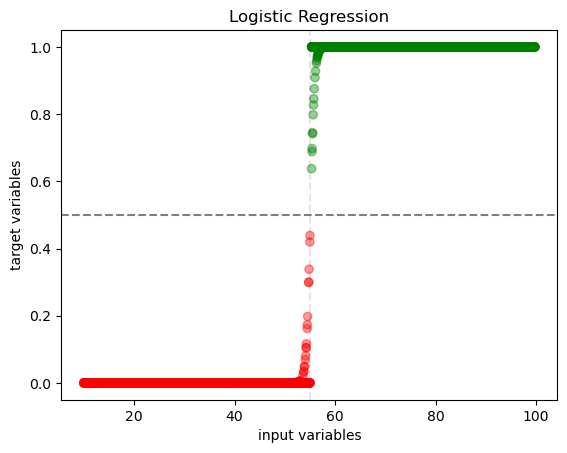

In [30]:
fig = plt.figure()
ax = fig.add_subplot()
colors = np.array(["red", "green"])
ax.scatter(X, y, c=colors[np.ravel(y.astype(int))])
ax.scatter(X, data['pred_prob'], c=colors[np.ravel(y.astype(int))], alpha=0.4)
plt.axhline(.5, color="black", label="cutoff", linestyle='--', alpha=.5)
plt.axvline(55, color="black", label="cutoff", linestyle='--', alpha=.1)
ax.set_xlabel('input variables')
ax.set_ylabel('target variables')
ax.set_title('Logistic Regression')
plt.show()

In the above graph 0 being false and 1 being true.

### Identify the coefficients and intercept.

In [31]:
log_reg.coef_
b0 = log_reg.intercept_[0]
b1 = log_reg.coef_[0][0]
r2 = log_reg.score(X, y)

print(f"Y = {b0:.2f} + {b1:.2f}x")
print(f"R^2: {r2:.3f}")

Y = -138.77 + 2.52x
R^2: 1.000


### Percentage of times this model correctly predict the outcome

In [32]:
print(((data['correct_prediction'].sum() / data.shape[0])*100) , '%')

100.0 %


In [33]:
pickle.dump(log_reg, open('we02a-logistic-model.pkl', "wb")) #Saving the model to disk for record

## Interpretation of the logistic regression model

The b1 coefficient is the change in the log odds of being a 1 for a 1 unit increase in the predictor variable. 

The log odds function is the natural log of the odds. It's also known as the logit function.

> $\log \left(\frac{p}{1-p}\right)=\operatorname{logit}(p)$

Based on the results from our logistic regression above, we can see that the coefficient for `input` is 2.43. This means that for a 1 unit increase in input, the log odds of being a true increases by 2.43.


$\operatorname{logit}(p)=\log \left(\frac{p}{1-p}\right)=-132.89 + 2.43x$

To find the probability of being a 1 we can use the inverse logit function (aka, logistic function).

### Derive the predicted probability from the logistic model


The logit function is defined as

$\operatorname{logit}(p)=\log \left(\frac{p}{1-p}\right)$

The logistic function, is defined as 

$\operatorname{logistic}(p)=\frac{1}{e^{\beta_0+\beta_1x}}$


When we use logistic regression (just as in regular regression), we are trying to find the best values for $\beta_0$ and $\beta_1$ that minimize the error between the predicted values and the actual values. But the interpretation of the coefficients is different.

$\operatorname{logit}(p)=\log \left(\frac{p}{1-p}\right)=\beta_0+\beta_1x$

### For illustration, take this relationship and derive the function for the probability of being a 1.

Exponentiate and take the multiplicative inverse of both sides, and we get the odds ratio.

$\frac{1-p}{p}=\frac{1}{e^{\beta_0+\beta_1x}}$

Partial out the fraction on the left-hand side of the equation and add one to both sides,

$\frac{1}{p}=1+\frac{1}{e^{\beta_0+\beta_1x}}$

Change 1 to a common denominator

$\frac{1}{p}=\frac{e^{\beta_0+\beta_1 x}+1}{e^{\beta_0+\beta_1 x}}$

Finally, take the multiplicative inverse again to obtain the formula for the probability P(target=1)

$p=\frac{e^{\beta_0+\beta_1 x}}{1+e^{\beta_0+\beta_1 x}}$


In [34]:
p_y_eq_1 = np.exp(b0 + b1 * X) / (1+ np.exp(b0 + b1 * X))
p_y_eq_1

,input
0,5.373407e-09
1,1.000000e+00
2,4.819180e-50
3,2.743638e-20
4,1.320649e-35
...,...
995,1.000000e+00
996,2.295611e-19
997,1.000000e+00
998,5.825199e-18


In [35]:
data.pred_prob

0      5.373407e-09
1      1.000000e+00
2      4.819180e-50
3      2.743638e-20
4      1.320649e-35
           ...     
995    1.000000e+00
996    2.295611e-19
997    1.000000e+00
998    5.825199e-18
999    1.000000e+00
Name: pred_prob, Length: 1000, dtype: float64

## Performance analysis of classification models

I will try to analyze the performance of the classification models that I have trained above. I am using the following metrics:
* Accuracy
* Precision
* Recall
* F1 score

### Loading and displaying the trained model and test data.

In [36]:
Xtest = testData[['input']]
ytest = testData[['target']]

In [37]:
testData.head(5)

,input,target
507,26.661736,False
818,74.509373,True
452,91.522855,True
368,57.378334,True
242,62.007149,True


In [38]:
model_preds = log_reg.predict(Xtest)

### Creating and displaying the confusion matrix

In [39]:
c_matrix = confusion_matrix(ytest, model_preds)
c_matrix

array([[104,   0],
       [  0,  96]], dtype=int64)

### Deriving Accuracy, Precision, Recall, F1 score

In [40]:
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]

In [41]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

In [42]:
print(f'{"Accuracy:":12s}{accuracy:.2f}')
print(f'{"Precision:":12s}{precision:.2f}')
print(f'{"Recall:":12s}{recall:>.2f}')
print(f'{"F1:":12s}{f1:>.2f}')

Accuracy:   1.00
Precision:  1.00
Recall:     1.00
F1:         1.00


## Conclusion

Based on the metrics I got, it appears that the logistic regression model performed extremely well on the test data set. I observed the following in each metrics

* Confusion Matrix: The confusion matrix for the model has no false positives and no false negatives, meaning every prediction was correct.

* Accuracy: This is the proportion of true results (both true positives and true negatives) in the total dataset. An accuracy of 1.0 indicates that the model made no mistakes on test set.

* Precision: Proportion of predicted Positives is truly Positive. A score of 1.0 means every item labeled as positive was indeed positive (no false positives).

* Recall: Proportion of actual Positives was identified correctly. A score of 1.0 means every positive item was identified correctly (no false negatives).

* F1 Score: F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. The model has an F1 score of 1, meaning it had perfect precision and recall.

According to the above metrics, the model has achieved perfect classification on test set. Further more I have implemnted cross validation and the model got perfect R^2 value which is 1. So I would say the logestic regression model is the best fit for the data.